In [145]:
import numpy as np
import skfuzzy
from skfuzzy import control
import pandas as pd

In [170]:
#Input Variables
Trad = control.Antecedent(np.arange(0, 169, 0.1), 'Trad')
IF = control.Antecedent(np.arange(-0.2, 0.16, 0.001), 'IF')
DBSCAN = control.Antecedent(np.arange(-1, 0.1, 0.01), 'DBSCAN')
LOF = control.Antecedent(np.arange(-4.5, 0, 0.01), 'LOF')
OCSVM = control.Antecedent(np.arange(1, 13, 0.1), 'OCSVM')
ABOD = control.Antecedent(np.arange(0, 0.05, 0.0001), 'ABOD')
Sample = control.Consequent(np.arange(-20, 50, 0.1), 'Sample')

C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is

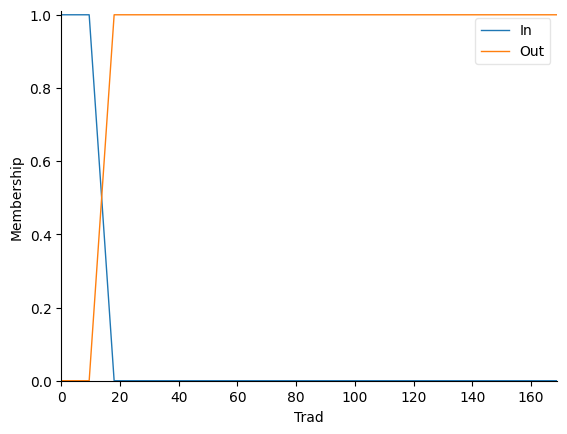

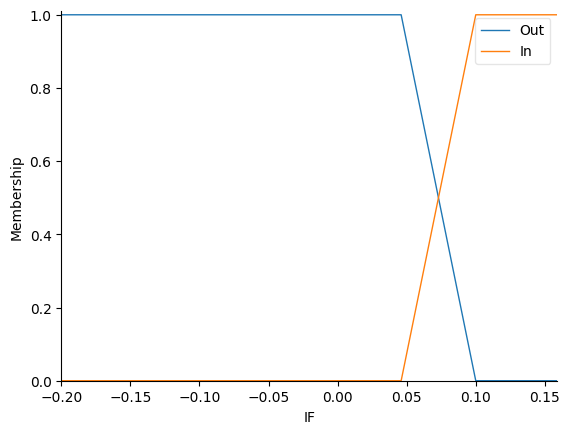

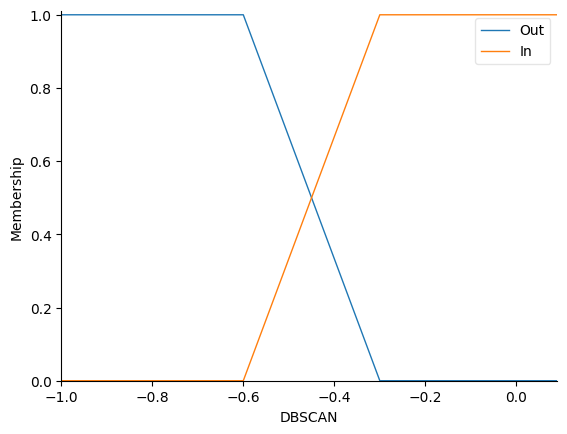

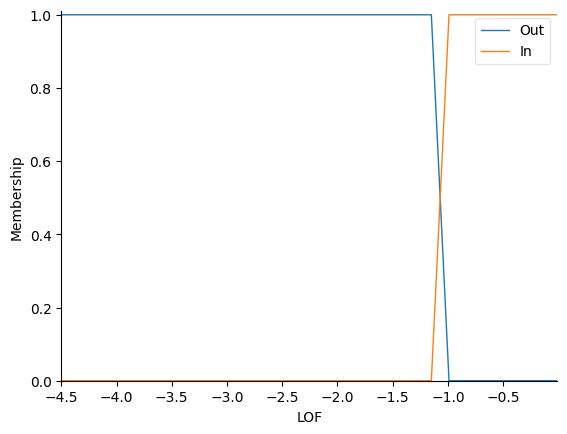

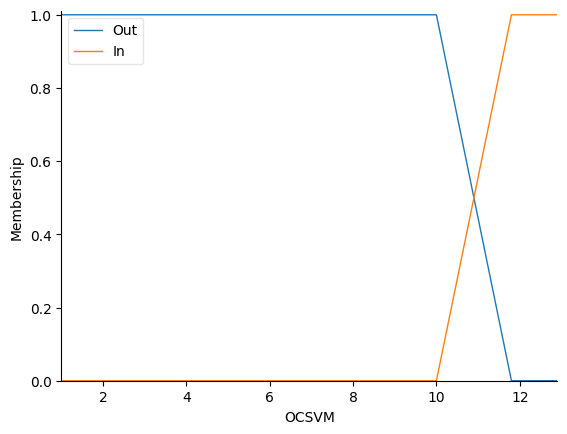

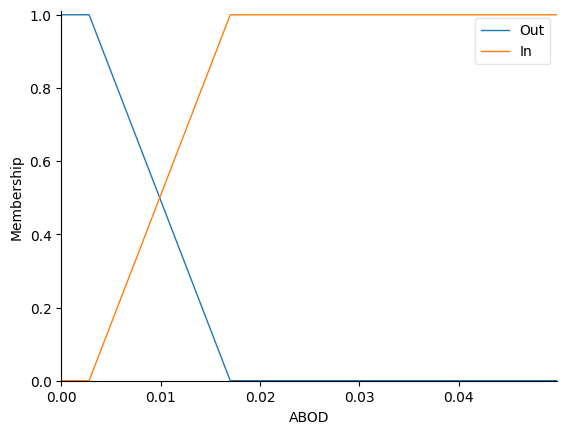

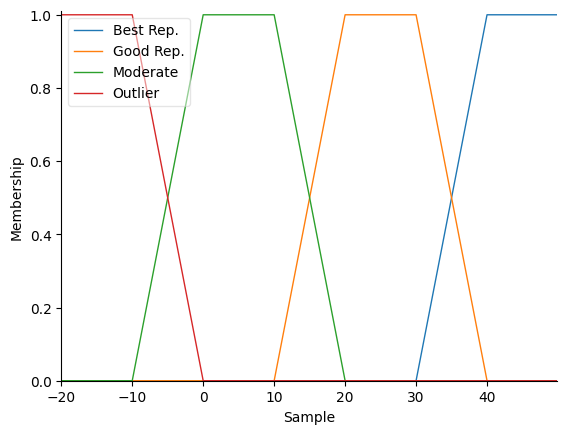

In [181]:
#membership functions (trapezoidal)
Trad['In']    = skfuzzy.trapmf(Trad.universe, [0, 0, 9.5, 18])
Trad['Out']   = skfuzzy.trapmf(Trad.universe, [9.5, 18, 169, 169])
IF['Out']     = skfuzzy.trapmf(IF.universe, [-0.2, -0.2, 0.046, 0.1])
IF['In']      = skfuzzy.trapmf(IF.universe, [0.046, 0.1, 0.16, 0.16])
DBSCAN['Out'] = skfuzzy.trapmf(DBSCAN.universe, [-1, -1, -0.6, -0.3])
DBSCAN['In']  = skfuzzy.trapmf(DBSCAN.universe, [-0.6, -0.3, 0.1, 0.1])
LOF['Out']    = skfuzzy.trapmf(LOF.universe, [-4.5, -4.5, -1.15, -0.99])
LOF['In']     = skfuzzy.trapmf(LOF.universe, [-1.15, -0.99, 0, 0])
OCSVM['Out']  = skfuzzy.trapmf(OCSVM.universe, [1, 1, 10, 11.8])
OCSVM['In']   = skfuzzy.trapmf(OCSVM.universe, [10, 11.8, 13, 13])
ABOD['Out']   = skfuzzy.trapmf(ABOD.universe, [0, 0, 0.0028, 0.017])
ABOD['In']    = skfuzzy.trapmf(ABOD.universe, [0.0028, 0.017, 0.05, 0.05])

Sample['Best Rep.'] = skfuzzy.trapmf(Sample.universe, [30, 40, 50, 50])
Sample['Good Rep.'] = skfuzzy.trapmf(Sample.universe, [10, 20, 30, 40])
Sample['Moderate']  = skfuzzy.trapmf(Sample.universe, [-10, 0, 10, 20])
Sample['Outlier']   = skfuzzy.trapmf(Sample.universe, [-20, -20, -10, 0])

Trad.view()
IF.view()
DBSCAN.view()
LOF.view()
OCSVM.view()
ABOD.view()
Sample.view()

In [182]:
# Defining Rule
T = [Trad['In'], Trad['Out']]
I = [IF['In'], IF['Out']]
D = [DBSCAN['In'], DBSCAN['Out']]
L = [LOF['In'], LOF['Out']]
O = [OCSVM['In'], OCSVM['Out']]
A = [ABOD['In'], ABOD['Out']]
counter = 0
R = []
for i in T:
    for j in I:
        for k in D:
            for l in L:
                for m in O:
                    for n in A:
                        R.append(i & j & k & l & m & n)
                        #print(counter, i & j & k & l & m & n)
                        counter += 1


rule1 = control.Rule(R[0] , Sample['Best Rep.'])
rule2 = control.Rule(R[1]  | R[2] | R[4] | R[8] | R[16] | R[32], Sample['Good Rep.'])
rule3 = control.Rule(R[3] |R[5] |R[6] |R[9] |R[10] |R[12] |R[17] | R[18] | R[20] | R[24] | R[33] | R[34] | R[36] | R[40] | R[48] , Sample['Moderate'])
rule4 = control.Rule(R[11] |R[13] |R[14] |R[19] |R[21] |R[22] |R[41] |R[42] |R[44] |R[7] |R[25] |R[26] |R[28] |R[35] |R[37] |R[38] |R[49] |R[50] |R[52] |R[56] , Sample['Moderate'])
rule5 = control.Rule(R[15] |R[23] |R[27] |R[29] |R[30] |R[39] |R[43] |R[45] |R[46] |R[51] |R[53] |R[54] |R[57] |R[58] |R[60] , Sample['Outlier'])
rule6 = control.Rule(R[62] | R[61] | R[59] | R[55]|R[47]|R[31],Sample['Outlier'])
rule7 = control.Rule(R[63] , Sample['Outlier'])


Rules =control.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
Outlier = control.ControlSystemSimulation(Rules)

In [183]:
#Inputs
data = pd.read_excel(r'C:\Users\Mehdi\Desktop\SOutput.xlsx')

def TakingValues(AllData):
    [a, b, c, d, e, f] = AllData
    Outlier.input['Trad']   = a
    Outlier.input['IF']     = b
    Outlier.input['DBSCAN'] = c
    Outlier.input['LOF']    = d
    Outlier.input['OCSVM']  = e
    Outlier.input['ABOD']   = f
    Outlier.compute()
    print(Outlier.output['Sample'])
    #Sample.view(sim=Outlier)
   
for i in range(0,55):
    TakingValues(data.iloc[i, :].to_numpy())




-11.265744843974469
-12.16755106299566
-3.2414696074461613
-12.222222222222205
-4.077285884585655
-12.222222222222205
-12.222222222222205
-12.222222222222205
3.3714833605649397
-3.7817533420192153
4.084540051645553
-11.685667300688765
-11.986175088007762
-12.222222222222205
1.7144226198507497
-7.056426080042612
10.853370472847464
10.08864905428669
19.665660486896076
8.13358042487581
13.525644092622947
22.329334273726484
15.39664961461909
30.546959956638357
-0.12188545599147857
9.607615655441855
19.1723094985219
18.725477058323737
-7.815165260575979
25.798148238676962
23.041093225664692
20.653980755845186
0.40999083071702064
-8.417604666034908
3.4113783896770333
24.707898340956877
30.73566568693942
37.17972924538315
27.992808377181074
24.995891492504345
15.215372042980599
15.741239130886132
16.178680439507506
-1.5430056493605298
25.00000000000001
25.00000000000001
14.872392971980416
18.284636031215186
14.866565358349877
27.08073879540865
14.5358632727518
24.99999999999511
26.92298533166